In [1]:
from othello_rules import *
from othello_net import *
from tensorflow.python.framework import ops
from datetime import datetime
from example_states import *
from feature_extractor import *
from training_utils import *
import numpy as np


In [2]:
def prep_supervised_progress(wrs_file, log=False):
    total_iterations = 0
    its = 0
    its_vector = []
    losses_vector = []
    with open(wrs_file) as f:
        for line in f:
            line_split = line.split(' ')
            prev_its = its
            #print(prev_its)
            its = line_split[4]
            its = int(its[:-1])
            #print(its)
            #print(its - prev_its)
            total_iterations = total_iterations + int(max(0, its - prev_its))
            loss = float(line_split[5])
            its_vector.append(total_iterations)
            losses_vector.append(loss)
            if log:
                print(line_split)
                print(total_iterations)
                print(loss)
    return losses_vector, its_vector

def prep_sane_progress(wrs_file, log=False, section=5):
    total_iterations = 0
    its = 0
    its_vector = []
    losses_vector = []
    learning_rate_checkpoints = []
    with open(wrs_file) as f:
        for line in f:
            line_split = line.split(' ')
            if len(line_split) < 7:
                learning_rate_checkpoints.append(total_iterations+0.5)
                continue
            total_iterations = total_iterations + 1
            loss = float(line_split[section])
            its_vector.append(total_iterations)
            losses_vector.append(loss)
            if log:
                print(line_split)
                print(total_iterations)
                print(loss)
    return losses_vector, its_vector, learning_rate_checkpoints
prep_sane_progress('logfile_sl_10l.txt', True)

['12.', 'Mar', '21:03:22,', 'Step', '0:', '0.230465793304', '36.3614232346\n']
1
0.230465793304
['12.', 'Mar', '22:09:49,', 'Step', '0:', '0.421572052402', '2.65223994739\n']
2
0.421572052402
['12.', 'Mar', '23:19:23,', 'Step', '0:', '0.458224163028', '2.51146126709\n']
3
0.458224163028
['13.', 'Mar', '00:33:41,', 'Step', '0:', '0.477933042213', '2.4247427109\n']
4
0.477933042213
['13.', 'Mar', '01:38:00,', 'Step', '0:', '0.48866084425', '2.35770161761\n']
5
0.48866084425
['13.', 'Mar', '02:39:17,', 'Step', '0:', '0.49770014556', '2.32704057342\n']
6
0.49770014556
['13.', 'Mar', '03:45:06,', 'Step', '0:', '0.505705967977', '2.28395878632\n']
7
0.505705967977
['13.', 'Mar', '04:49:19,', 'Step', '0:', '0.509461426492', '2.26794707743\n']
8
0.509461426492
['13.', 'Mar', '05:53:09,', 'Step', '0:', '0.51500727802', '2.23235503889\n']
9
0.51500727802
['13.', 'Mar', '06:57:01,', 'Step', '0:', '0.522649199418', '2.22681046339\n']
10
0.522649199418
['13.', 'Mar', '08:08:08,', 'Step', '0:', '0.5

([0.230465793304,
  0.421572052402,
  0.458224163028,
  0.477933042213,
  0.48866084425,
  0.49770014556,
  0.505705967977,
  0.509461426492,
  0.51500727802,
  0.522649199418,
  0.524381368268,
  0.529519650655,
  0.525938864629,
  0.525938864629,
  0.53576419214,
  0.539752547307,
  0.540815138282,
  0.535705967977,
  0.543959243086,
  0.542168850073,
  0.540072780204,
  0.546521106259,
  0.546986899563,
  0.546812227074,
  0.546710334789,
  0.549883551674,
  0.550902474527,
  0.550480349345,
  0.552168850073,
  0.551819505095,
  0.55269286754,
  0.552620087336,
  0.555676855895,
  0.551251819505,
  0.552401746725,
  0.554294032023],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [13.5])

Now: logfile_sl_10l.txt


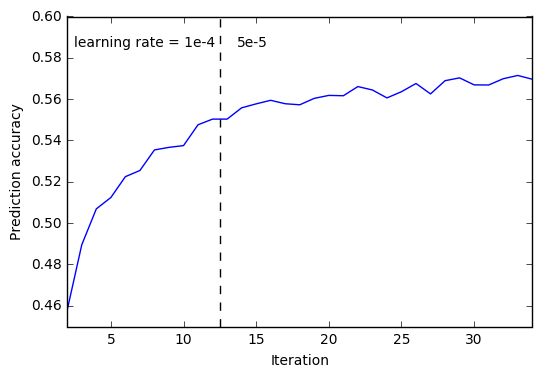

Now: logfile_sl_9l.txt


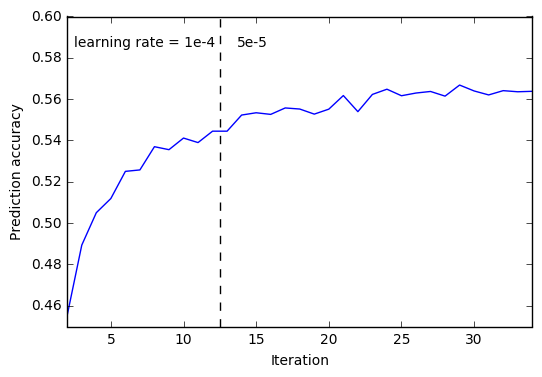

Now: logfile_sl_8l.txt


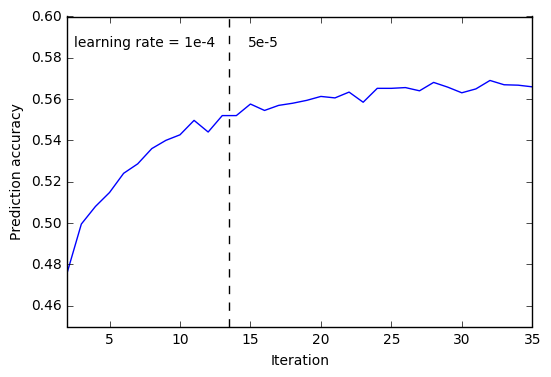

Now: logfile_sl_7l.txt


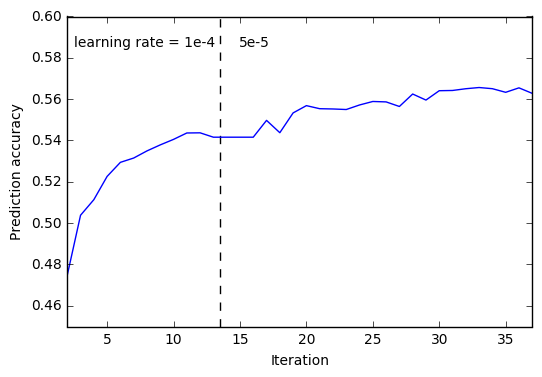

Now: logfile_sl_10l.txt


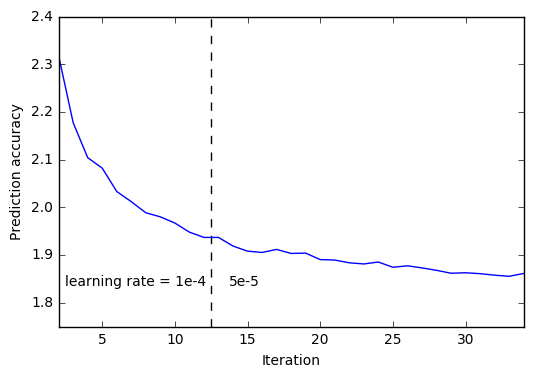

Now: logfile_sl_9l.txt


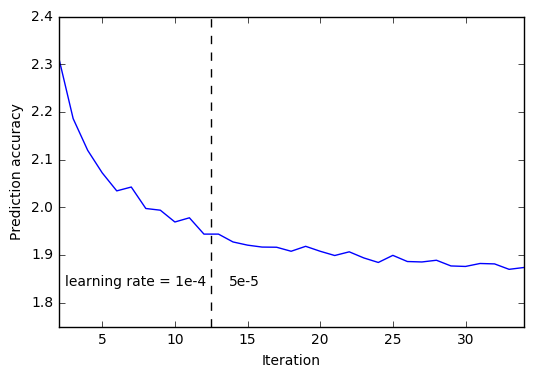

Now: logfile_sl_8l.txt


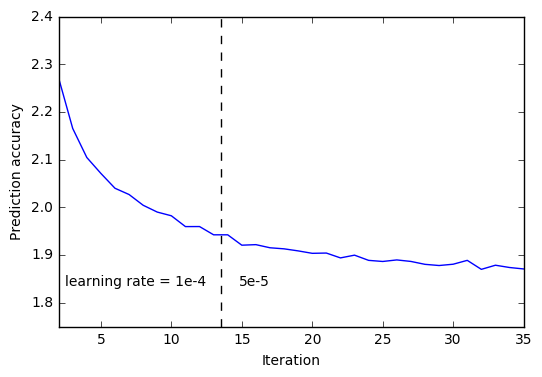

Now: logfile_sl_7l.txt


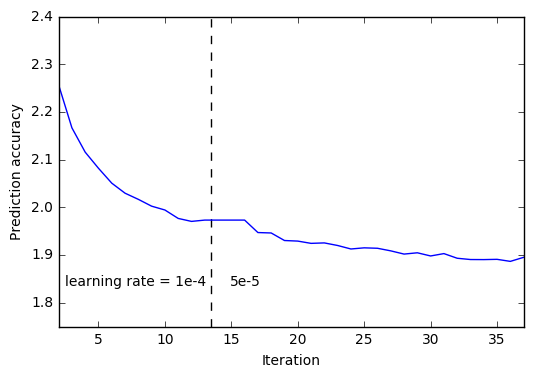

Now: logfile_sl_10l_exp.txt


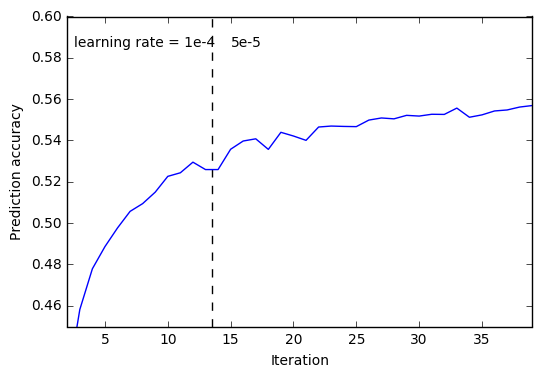

Now: logfile_sl_9l_exp.txt


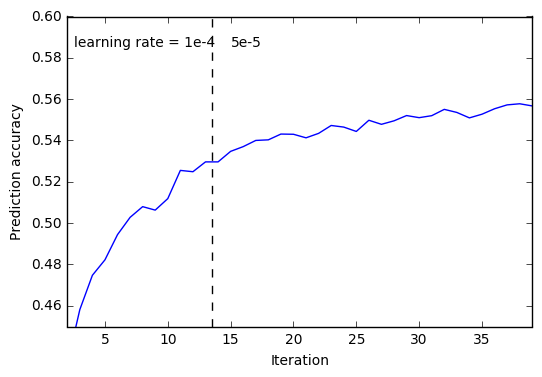

Now: logfile_sl_8l_exp.txt


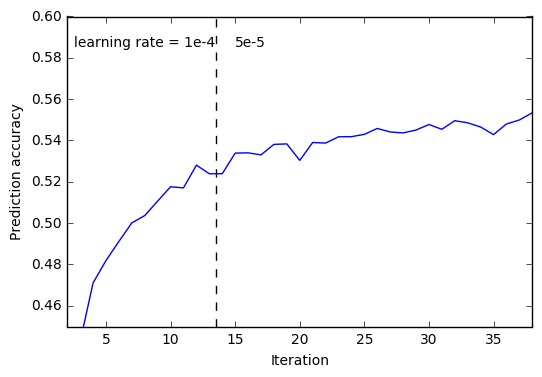

Now: logfile_sl_7l_exp.txt


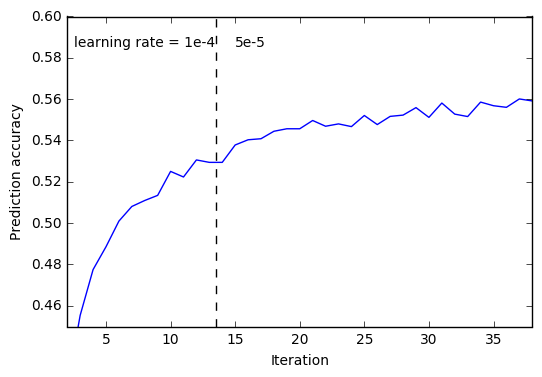

Now: logfile_sl_10l_exp.txt


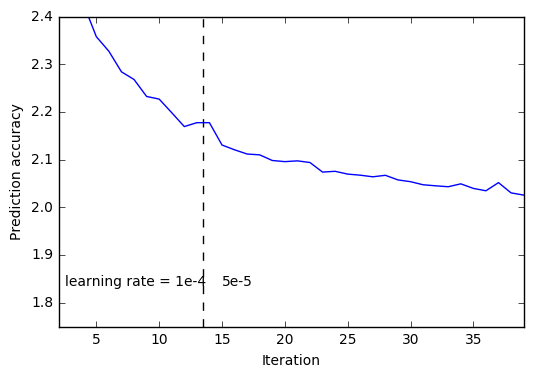

Now: logfile_sl_9l_exp.txt


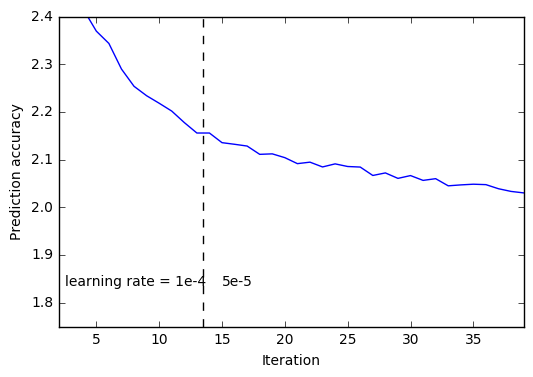

Now: logfile_sl_8l_exp.txt


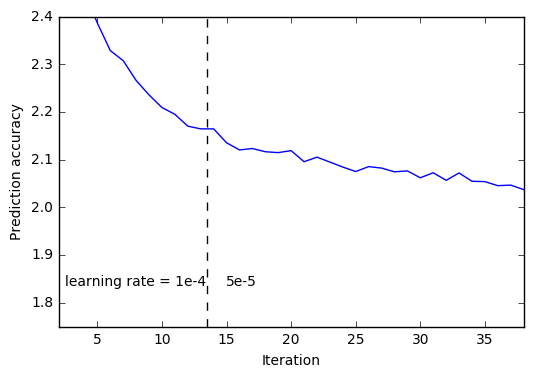

Now: logfile_sl_7l_exp.txt


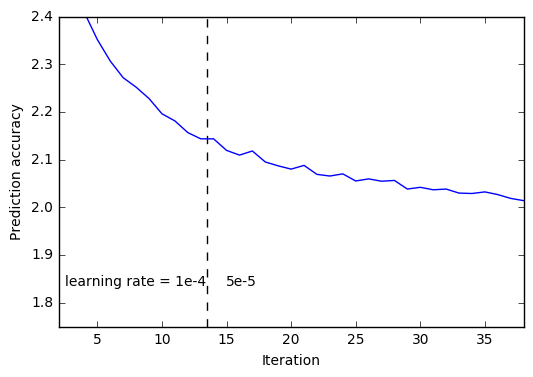

In [10]:
import matplotlib.pyplot
import pylab
import numpy as np
from scipy.stats import linregress
%matplotlib inline

def plot_accuracies(logfile, section=5):
    print("Now: " + logfile)
    winrates, deltas, checkpoints = prep_sane_progress(logfile, False, section)
    winrates = winrates[1:]
    deltas = np.array(deltas[1:])
    #deltas = deltas - 2
    axes = matplotlib.pyplot.gca()
    if section == 5:
        y_annotate = 0.585
        axes.set_ylim([0.45, 0.6])
    else: 
        y_annotate = 1.83
        axes.set_ylim([1.75, 2.4])
    axes.set_xlim([deltas[0],deltas[-1]])
    matplotlib.pyplot.annotate('learning rate = 1e-4', 
             xy=(deltas[0]+0.25, y_annotate),  
             xycoords='data',
             textcoords='offset points')
    matplotlib.pyplot.annotate('5e-5', 
             xy=(checkpoints[0]+0.0, y_annotate),  
             xycoords='data',
             textcoords='offset points')
    for xc in checkpoints:
        matplotlib.pyplot.axvline(x=xc, color='k', linestyle='--')
    matplotlib.pyplot.xlabel('Iteration')
    matplotlib.pyplot.ylabel('Prediction accuracy')
    matplotlib.pyplot.plot(deltas, winrates)
    matplotlib.pyplot.show()

plot_accuracies('logfile_sl_10l.txt')
plot_accuracies('logfile_sl_9l.txt')
plot_accuracies('logfile_sl_8l.txt')
plot_accuracies('logfile_sl_7l.txt')

plot_accuracies('logfile_sl_10l.txt', 6)
plot_accuracies('logfile_sl_9l.txt',  6)
plot_accuracies('logfile_sl_8l.txt',  6)
plot_accuracies('logfile_sl_7l.txt',  6)


plot_accuracies('logfile_sl_10l_exp.txt')
plot_accuracies('logfile_sl_9l_exp.txt')
plot_accuracies('logfile_sl_8l_exp.txt')
plot_accuracies('logfile_sl_7l_exp.txt')

plot_accuracies('logfile_sl_10l_exp.txt', 6)
plot_accuracies('logfile_sl_9l_exp.txt',  6)
plot_accuracies('logfile_sl_8l_exp.txt',  6)
plot_accuracies('logfile_sl_7l_exp.txt',  6)

